<a href="https://colab.research.google.com/github/Dhavalkumar510/Final_Year_Project_UH/blob/main/Final_Year_Project_UH.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing necessary Libraray Functions

In [1]:
pip install yfinance

In [29]:
import yfinance as yf
import itertools
from datetime import datetime
import numpy as np
import pandas as pd
import seaborn as sns
from prophet import Prophet
from prophet.plot import plot_plotly, plot_components_plotly
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout, Bidirectional, BatchNormalization
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
from tensorflow.keras.layers import LSTM, SimpleRNN, Dense, Dropout
from keras.utils import plot_model
from sklearn.metrics import mean_squared_error
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.utils import plot_model
import matplotlib.image as mpimg
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import math


In [65]:
# Define the stock ticker (Lloyds Banking Group PLC)
ticker = 'LLOY.L'

# Get today's date in dd-mm-yyyy format
today = datetime.today().strftime('%d-%m-%Y')

# Fetch historical data until today
yf_data = yf.download(ticker, start='2010-01-01', end=datetime.today().strftime('%Y-%m-%d'))

# Convert the index to dd-mm-yyyy format
yf_data.index = yf_data.index.strftime('%d-%m-%Y')

data = yf_data

# Display the DataFrame

print(pd.DataFrame(data.head(15)))

print(pd.DataFrame(data.tail(15)))

[*********************100%***********************]  1 of 1 completed

Price       Adj Close      Close       High        Low       Open     Volume
Ticker         LLOY.L     LLOY.L     LLOY.L     LLOY.L     LLOY.L     LLOY.L
Date                                                                        
04-01-2010  36.779499  52.259998  52.259998  51.099998  51.400002  167623403
05-01-2010  38.025181  54.029999  54.759998  52.200001  52.500000  233026957
06-01-2010  38.419300  54.590000  55.230000  53.169998  55.000000  142079248
07-01-2010  40.066147  56.930000  57.070000  54.000000  54.860001  216171360
08-01-2010  40.045029  56.900002  57.520000  56.160000  56.990002  178033888
11-01-2010  39.503124  56.130001  57.950001  55.630001  57.799999  169834032
12-01-2010  39.390514  55.970001  56.290001  55.080002  55.590000  189050155
13-01-2010  39.411633  56.000000  56.200001  55.160000  55.639999  117598072
14-01-2010  40.467300  57.500000  58.000000  56.580002  57.000000  225878876
15-01-2010  39.960583  56.779999  58.509998  56.599998  57.709999  241352597

In [4]:
print("Missing values before handling:")
print(data.isnull().sum())

Missing values before handling:
Price      Ticker
Adj Close  LLOY.L    0
Close      LLOY.L    0
High       LLOY.L    0
Low        LLOY.L    0
Open       LLOY.L    0
Volume     LLOY.L    0
dtype: int64


In [5]:
# Save data to a CSV file
data.to_csv("Lloyds_Bank_Data.csv")

# Opening Price

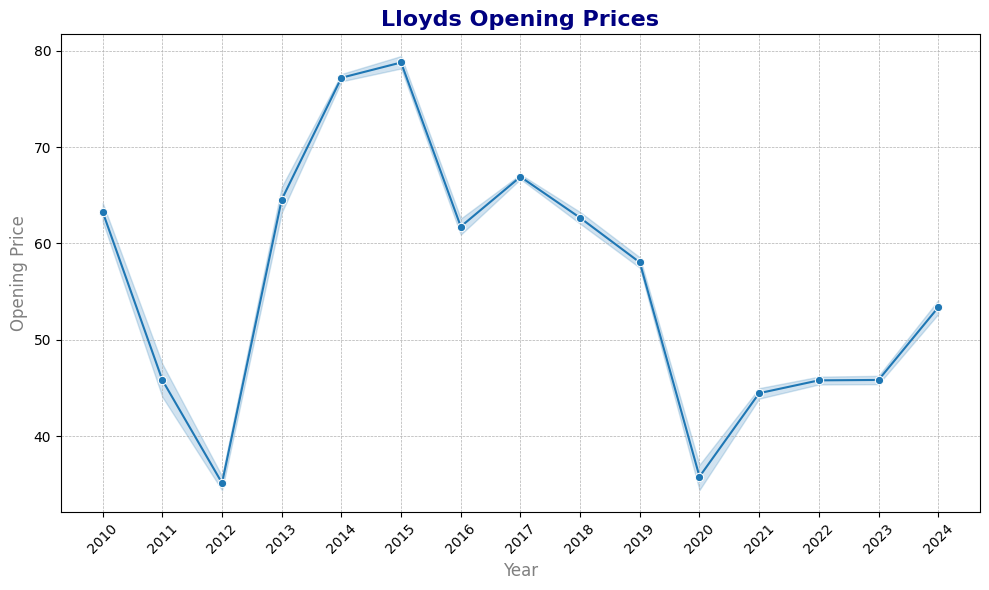

In [6]:
data.index = pd.to_datetime(data.index, format='%d-%m-%Y')
years = data.index.year

# Plot Opening Prices
plt.figure(figsize=(10, 6))
sns.lineplot(x=years, y=data['Open'].values.ravel(), color='#1f77b4', marker='o')
plt.title('Lloyds Opening Prices', fontsize=16, color='navy', weight='bold')
plt.xlabel('Year', fontsize=12, color='gray')
plt.ylabel('Opening Price', fontsize=12, color='gray')

# Set x-ticks to show unique years
plt.xticks(ticks=range(years.min(), years.max() + 1), rotation=45)

plt.grid(visible=True, linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

# Closing Price

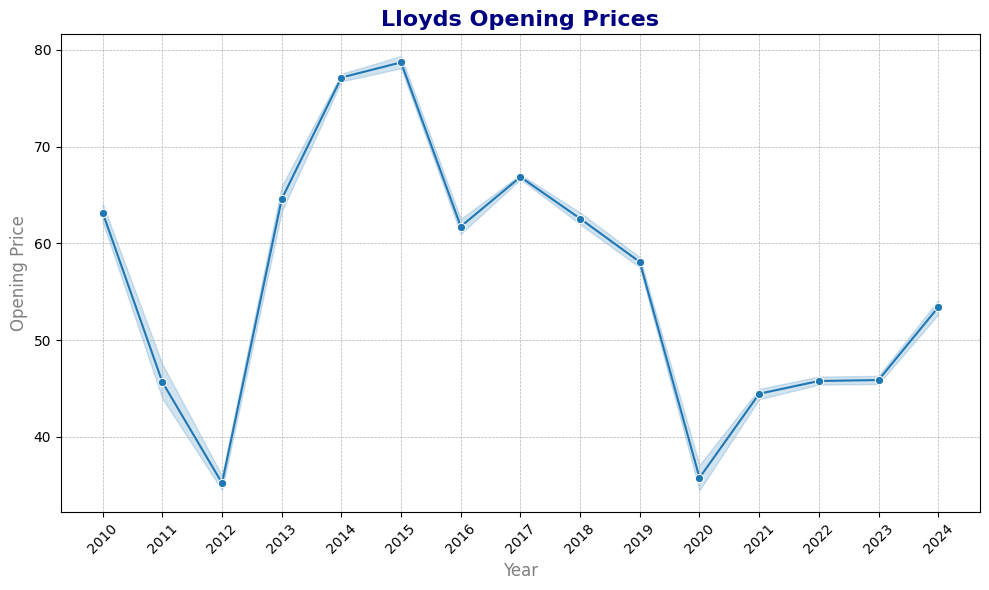

In [7]:
data.index = pd.to_datetime(data.index, format='%d-%m-%Y')
years = data.index.year

# Plot Opening Prices
plt.figure(figsize=(10, 6))
sns.lineplot(x=years, y=data['Close'].values.ravel(), color='#1f77b4', marker='o')
plt.title('Lloyds Opening Prices', fontsize=16, color='navy', weight='bold')
plt.xlabel('Year', fontsize=12, color='gray')
plt.ylabel('Opening Price', fontsize=12, color='gray')

# Set x-ticks to show unique years
plt.xticks(ticks=range(years.min(), years.max() + 1), rotation=45)
plt.grid(visible=True, linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

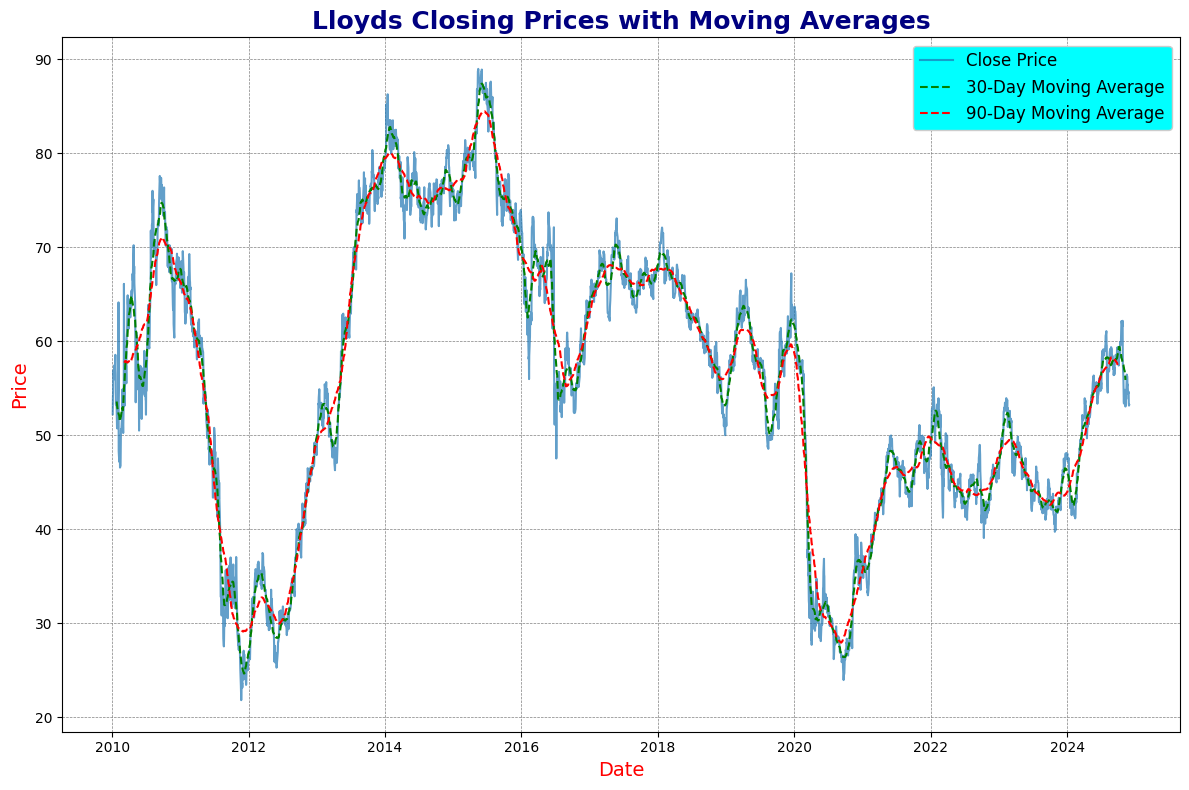

In [8]:
import matplotlib.pyplot as plt

# Ensure the index is in datetime format
data.index = pd.to_datetime(data.index, format='%d-%m-%Y')

# Calculate Moving Averages
data['MA_30'] = data['Close'].rolling(window=30, center=True).mean()  # 30-day moving average
data['MA_90'] = data['Close'].rolling(window=90, center=True).mean()  # 90-day moving average

# Plot Close Prices with Moving Averages
plt.figure(figsize=(12, 8))
# Plot the data
plt.plot(data.index, data['Close'], label='Close Price', color='#1f77b4', alpha=0.7, linewidth=1.5)  # Blue for close price
plt.plot(data.index, data['MA_30'], label='30-Day Moving Average', color='green', linestyle='--', linewidth=1.5)  # Orange for MA_30
plt.plot(data.index, data['MA_90'], label='90-Day Moving Average', color='red', linestyle='--', linewidth=1.5)  # Green for MA_90

# Add labels and title
plt.title('Lloyds Closing Prices with Moving Averages', fontsize=18, color='navy', weight='bold')
plt.xlabel('Date', fontsize=14, color='Red')
plt.ylabel('Price', fontsize=14, color='Red')

# Add a legend with a colored box
legend = plt.legend(frameon=True, loc='upper right', fontsize=12)
frame = legend.get_frame()
frame.set_facecolor('cyan')
frame.set_alpha(1)
# Add grid
plt.grid(visible=True, linestyle='--', linewidth=0.5, color='gray')

# Adjust layout and show plot
plt.tight_layout()
plt.show()


# LSTM Model

In [9]:
# Scale the Close Prices
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data['Close'].values.reshape(-1, 1))

# Prepare data for LSTM
def create_lstm_dataset(dataset, time_step=30):
    X, y = [], []
    for i in range(len(dataset) - time_step):
        X.append(dataset[i:i + time_step])
        y.append(dataset[i + time_step])
    return np.array(X), np.array(y)

# Define time step for sequence
time_step = 30
X, y = create_lstm_dataset(scaled_data, time_step)

# Split data into train and test sets
train_size = int(len(X) * 0.8)
X_train, y_train = X[:train_size], y[:train_size]
X_test, y_test = X[train_size:], y[train_size:]

# Build the LSTM model
model = Sequential([
    Bidirectional(LSTM(100, return_sequences=True, input_shape=(time_step, 1))),
    Dropout(0.3),
    BatchNormalization(),
    LSTM(50, return_sequences=False),
    Dropout(0.2),
    Dense(25, activation='relu', kernel_regularizer='l2'),
    Dense(1)
])

# Compile the model
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='mean_squared_error')

model.build(input_shape=(None, time_step, 1))

# Visualize the model architecture
plot_model(model, show_shapes=True, show_layer_names=True, to_file='lstm_architecture.png')

# Train the model
model.fit(X_train, y_train, epochs=20, batch_size=32, verbose=1)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 22s 11ms/step - loss: 0.3528
Epoch 2/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.1665
Epoch 3/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0818
Epoch 4/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0416
Epoch 5/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0227
Epoch 6/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0143
Epoch 7/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0097
Epoch 8/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0080
Epoch 9/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0057
Epoch 10/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0051
Epoch 11/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0038
Epoch 12/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0033
Epoch 13/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0030
Epoch 14/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0025
Epoch 15/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0023
Epo

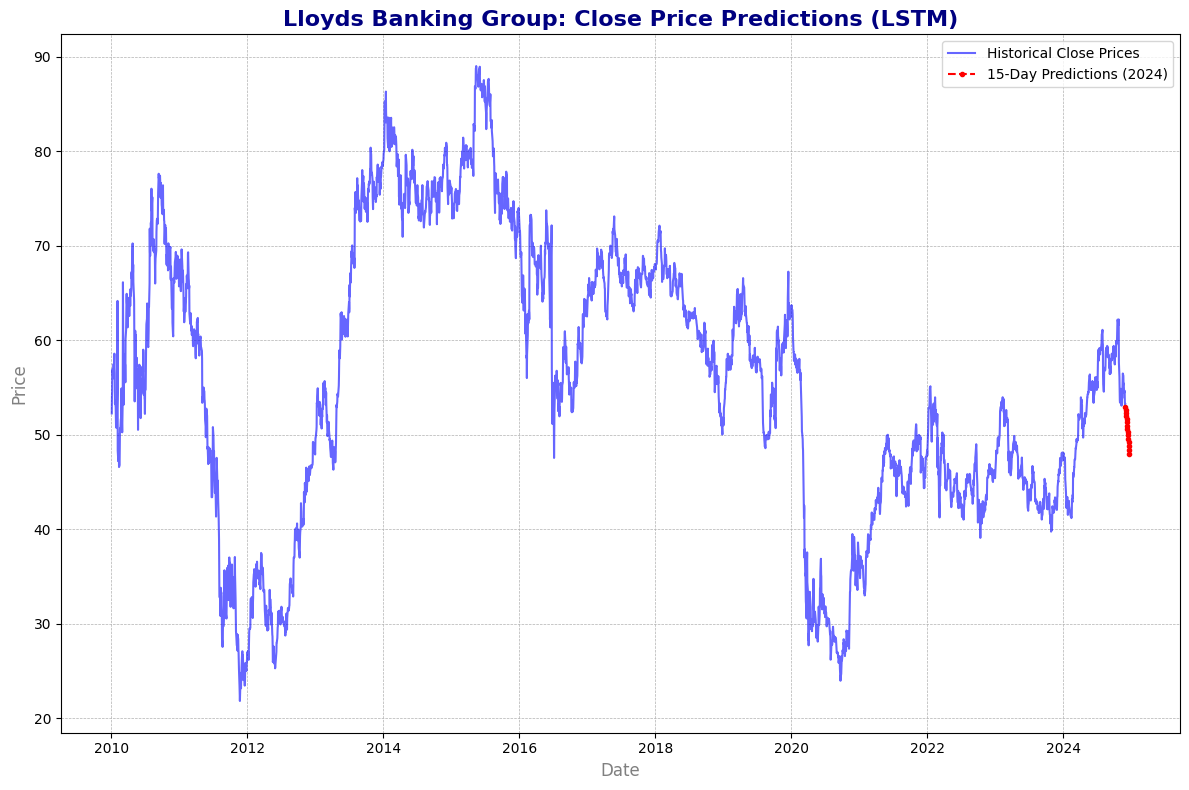

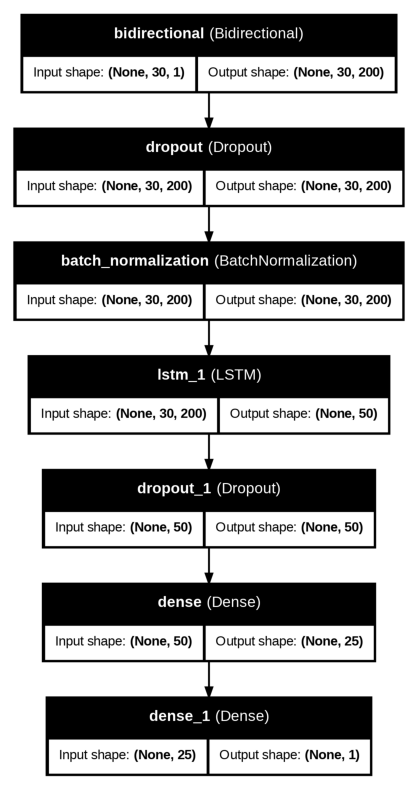

         Date  Predicted Close
0  2024-11-29        52.924576
1  2024-12-02        52.596535
2  2024-12-03        52.275528
3  2024-12-04        51.954906
4  2024-12-05        51.631847
5  2024-12-06        51.304764
6  2024-12-09        50.972607
7  2024-12-10        50.634232
8  2024-12-11        50.288651
9  2024-12-12        49.934845
10 2024-12-13        49.571819
11 2024-12-16        49.198570
12 2024-12-17        48.814114
13 2024-12-18        48.417412
14 2024-12-19        48.007401


In [10]:
# Predict future values for the next 15 business days using the most recent sequence
last_sequence = scaled_data[-time_step:]
future_predictions = []

for _ in range(15):
    prediction = model.predict(last_sequence.reshape(1, time_step, 1), verbose=0)
    future_predictions.append(prediction[0, 0])
    last_sequence = np.append(last_sequence[1:], prediction, axis=0)

# Inverse scale the predictions back to the original scale
future_predictions = scaler.inverse_transform(np.array(future_predictions).reshape(-1, 1))

# Generate future dates starting from the last available date
future_dates = pd.date_range(start=data.index[-1], periods=16, freq='B')[1:]  # Exclude the last date

# Create a DataFrame for future predictions
future_df = pd.DataFrame({'Date': future_dates, 'Predicted Close': future_predictions.ravel()})

# Plot the predictions
plt.figure(figsize=(12, 8))
plt.plot(data.index, data['Close'], label='Historical Close Prices', color='blue', alpha=0.6)
plt.plot(future_df['Date'], future_df['Predicted Close'], label='15-Day Predictions (2024)', color='red', linestyle='--', marker='.')
plt.title('Lloyds Banking Group: Close Price Predictions (LSTM)', fontsize=16, color='navy', weight='bold')
plt.xlabel('Date', fontsize=12, color='gray')
plt.ylabel('Price', fontsize=12, color='gray')
plt.legend()
plt.grid(visible=True, linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

# Display the LSTM model architecture image
img = mpimg.imread('lstm_architecture.png')
plt.figure(figsize=(10, 10))
plt.imshow(img)
plt.axis('off')  # Hide axes
plt.show()

# Print predicted values
print(future_df)


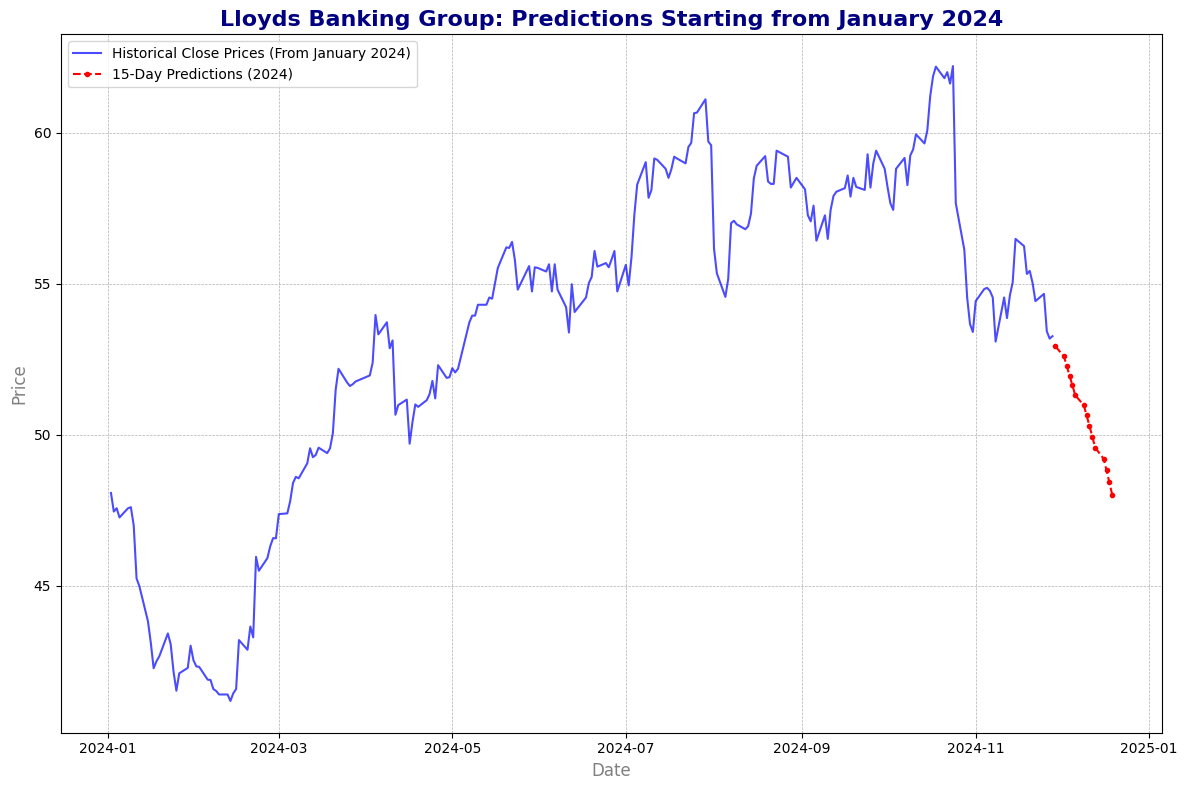

In [11]:
# Convert the index to datetime format (if not already done)
data.index = pd.to_datetime(data.index, format='%d-%m-%Y')

# Filter data starting from January 1, 2024
filtered_data = data[data.index >= '2024-01-01']

# Plot the subset data with predictions
plt.figure(figsize=(12, 8))
plt.plot(filtered_data.index, filtered_data['Close'], label='Historical Close Prices (From January 2024)', color='blue', alpha=0.7)
plt.plot(future_df['Date'], future_df['Predicted Close'], label='15-Day Predictions (2024)', color='red', linestyle='--', marker='.')
plt.title('Lloyds Banking Group: Predictions Starting from January 2024', fontsize=16, color='navy', weight='bold')
plt.xlabel('Date', fontsize=12, color='gray')
plt.ylabel('Price', fontsize=12, color='gray')
plt.legend()
plt.grid(visible=True, linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()


24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step
Test Evaluation Metrics:
Mean Squared Error (MSE): 1.8919
Root Mean Squared Error (RMSE): 1.3755
Mean Absolute Error (MAE): 1.1228
R-squared (R²): 0.9360


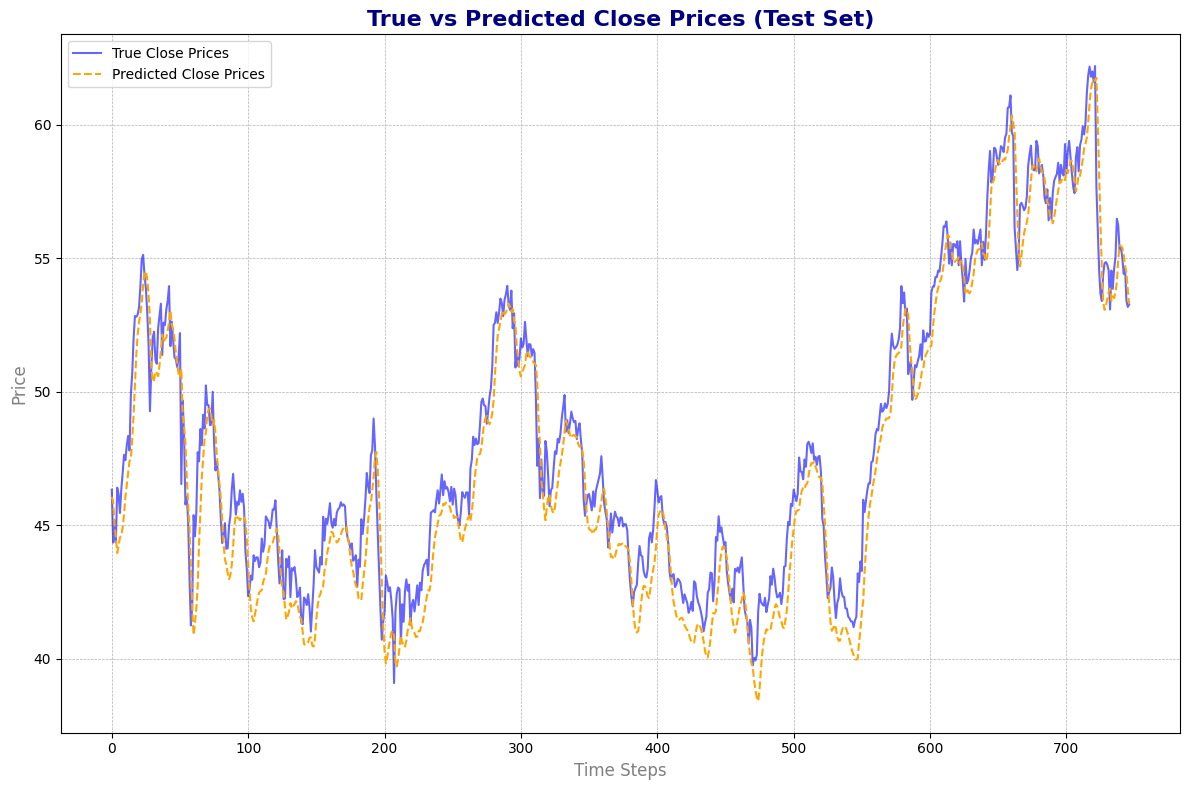

In [12]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import math

# Make predictions on the test set
y_pred = model.predict(X_test)

# Inverse transform the scaled predictions and true values
y_pred_original = scaler.inverse_transform(y_pred)
y_test_original = scaler.inverse_transform(y_test)

# Calculate evaluation metrics
mse = mean_squared_error(y_test_original, y_pred_original)
rmse = math.sqrt(mse)
mae = mean_absolute_error(y_test_original, y_pred_original)
r2 = r2_score(y_test_original, y_pred_original)

# Print the evaluation metrics
print("Test Evaluation Metrics:")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"R-squared (R²): {r2:.4f}")

# Plot true vs predicted prices for the test set
plt.figure(figsize=(12, 8))
plt.plot(y_test_original, label='True Close Prices', color='blue', alpha=0.6)
plt.plot(y_pred_original, label='Predicted Close Prices', color='orange', linestyle='--')
plt.title('True vs Predicted Close Prices (Test Set)', fontsize=16, color='navy', weight='bold')
plt.xlabel('Time Steps', fontsize=12, color='gray')
plt.ylabel('Price', fontsize=12, color='gray')
plt.legend()
plt.grid(visible=True, linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()


#ARIMA Model

In [13]:
pip install pmdarima

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 53.0 MB/s eta 0:00:00


Searching for the best ARIMA parameters...


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(8, 0, 8) - AIC: 12493.836115669954


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(8, 0, 9) - AIC: 11630.541183601232


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(8, 1, 8) - AIC: 11610.97593340505


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(8, 1, 9) - AIC: 11638.273439299119


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(9, 0, 8) - AIC: 11791.985094843045


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(9, 0, 9) - AIC: 11679.000161499644


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(9, 1, 8) - AIC: 11605.094850892967


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(9, 1, 9) - AIC: 11583.667255272529

Best ARIMA Model Found:
Order: (9, 1, 9) with AIC: 11583.667255272529


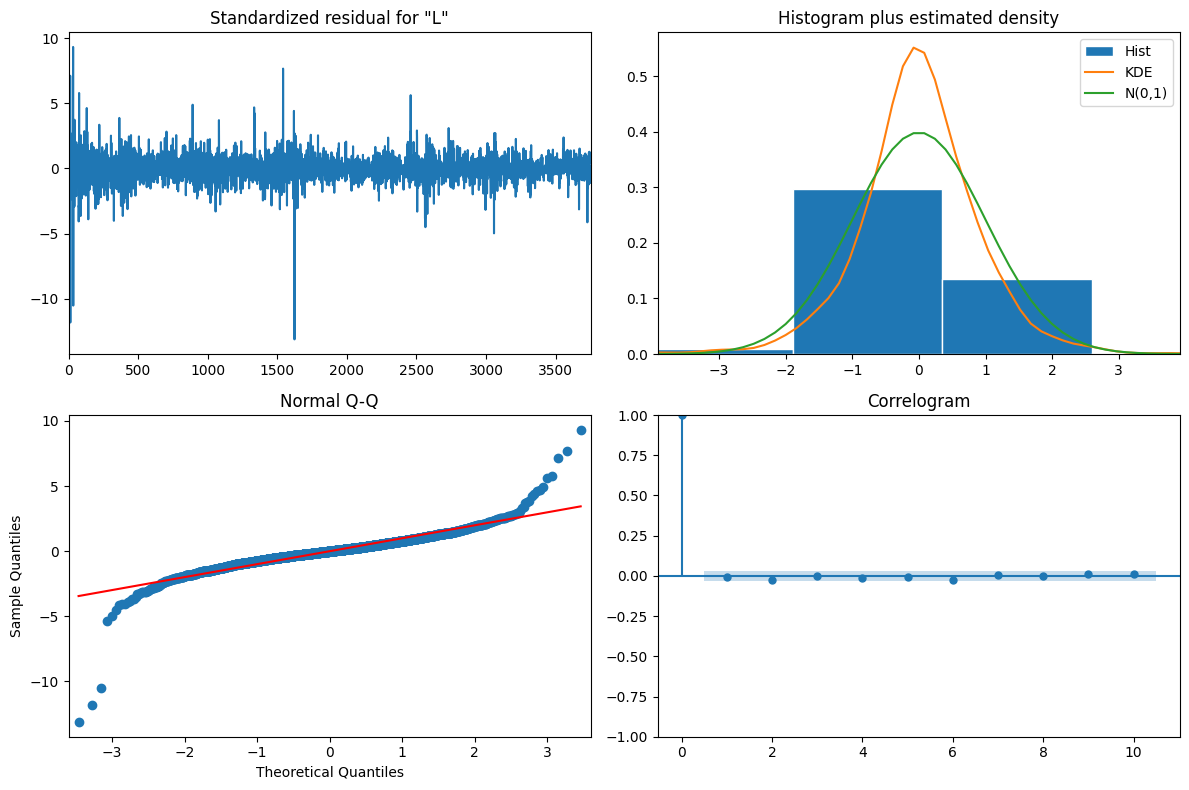

In [17]:
# Making a datacopy which can be used to bulid a model

data1 =data.copy()

# Extract the 'Close' prices for time series analysis
close_prices = data1['Close']

# Define the range of (p, d, q) parameters for ARIMA
p = q = range(8, 10)  # You can expand the range for a more exhaustive search
d = range(0, 2)  # Typically, d is small
pdq = list(itertools.product(p, d, q))

# Initialize variables to store the best model
min_aic = float('inf')
best_order = None
best_model = None

# Grid search for the best ARIMA parameters
print("Searching for the best ARIMA parameters...")
for param in pdq:
    try:
        # Fit the model
        model = SARIMAX(close_prices, order=param, enforce_stationarity=False, enforce_invertibility=False)
        results = model.fit(disp=False)

        # Check the AIC value
        if results.aic < min_aic:
            min_aic = results.aic
            best_order = param
            best_model = results

        # Print progress
        print(f"ARIMA{param} - AIC: {results.aic}")
    except Exception as e:
        print(f"ARIMA{param} failed. Error: {e}")
        continue

print("\nBest ARIMA Model Found:")
print(f"Order: {best_order} with AIC: {min_aic}")

# Model diagnostics
best_model.plot_diagnostics(figsize=(12, 8))
plt.tight_layout()
plt.show()


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


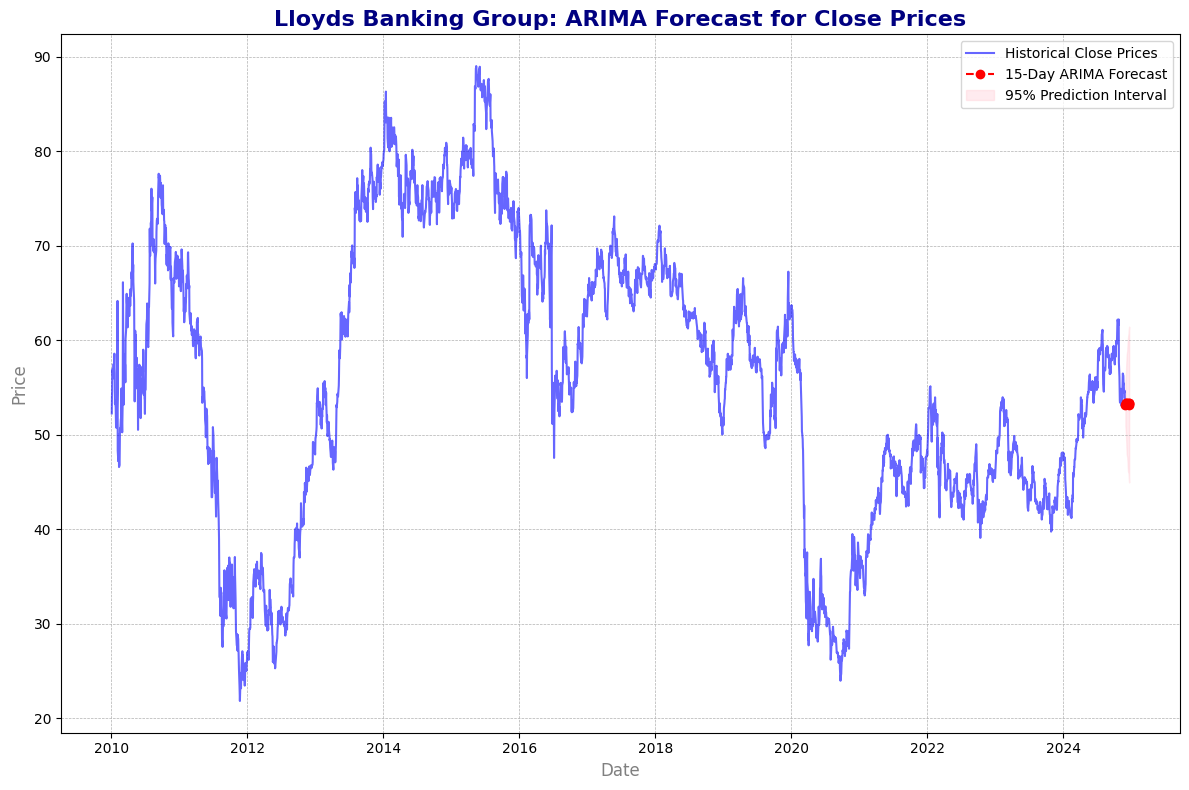

Forecasted Close Prices for the Next 15 Days of 2024:
           Date  Forecasted Close  Lower Bound  Upper Bound
3765 2024-11-29         53.170416    50.953394    55.387438
3766 2024-12-02         53.208337    50.079853    56.336822
3767 2024-12-03         53.326903    49.543581    57.110225
3768 2024-12-04         53.371991    49.035280    57.708702
3769 2024-12-05         53.218730    48.406902    58.030559
3770 2024-12-06         53.215175    47.971228    58.459122
3771 2024-12-09         53.259452    47.599888    58.919015
3772 2024-12-10         53.340332    47.285313    59.395350
3773 2024-12-11         53.288534    46.861212    59.715856
3774 2024-12-12         53.231233    46.476072    59.986393
3775 2024-12-13         53.202077    46.124969    60.279184
3776 2024-12-16         53.325476    45.946962    60.703990
3777 2024-12-17         53.352241    45.672109    61.032372
3778 2024-12-18         53.244067    45.283670    61.204465
3779 2024-12-19         53.199455    44.962317

In [18]:

# Forecast for the next 15 business days
forecast = best_model.get_forecast(steps=15)
forecast_values = forecast.predicted_mean
forecast_conf_int = forecast.conf_int()

# Generate future dates
start_date = close_prices.index[-1]  # Last date of the historical data
future_dates = pd.date_range(start=start_date, periods=16, freq='B')[1:]  # Generate 15 business days

# Create a DataFrame for the forecasted values
forecast_df = pd.DataFrame({
    'Date': future_dates,
    'Forecasted Close': forecast_values,
    'Lower Bound': forecast_conf_int.iloc[:, 0],
    'Upper Bound': forecast_conf_int.iloc[:, 1]
})

# Plot the historical data and the forecast
plt.figure(figsize=(12, 8))
plt.plot(close_prices.index, close_prices, label='Historical Close Prices', color='blue', alpha=0.6)
plt.plot(forecast_df['Date'], forecast_df['Forecasted Close'], label='15-Day ARIMA Forecast', color='red', linestyle='--', marker='o')
plt.fill_between(forecast_df['Date'], forecast_df['Lower Bound'], forecast_df['Upper Bound'], color='pink', alpha=0.3, label='95% Prediction Interval')
plt.title('Lloyds Banking Group: ARIMA Forecast for Close Prices', fontsize=16, color='navy', weight='bold')
plt.xlabel('Date', fontsize=12, color='gray')
plt.ylabel('Price', fontsize=12, color='gray')
plt.legend()
plt.grid(visible=True, linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

# Display forecasted values
print("Forecasted Close Prices for the Next 15 Days of 2024:")
print(forecast_df)

# Calculate RMSE
y_true = close_prices[-15:]  # Adjust if validation set is used
y_forecasted = forecast.predicted_mean[:len(y_true)]  # Limit predictions to historical overlap
mse = mean_squared_error(y_true, y_forecasted)
rmse = np.sqrt(mse)
print(f"\nModel Evaluation Metrics:")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")


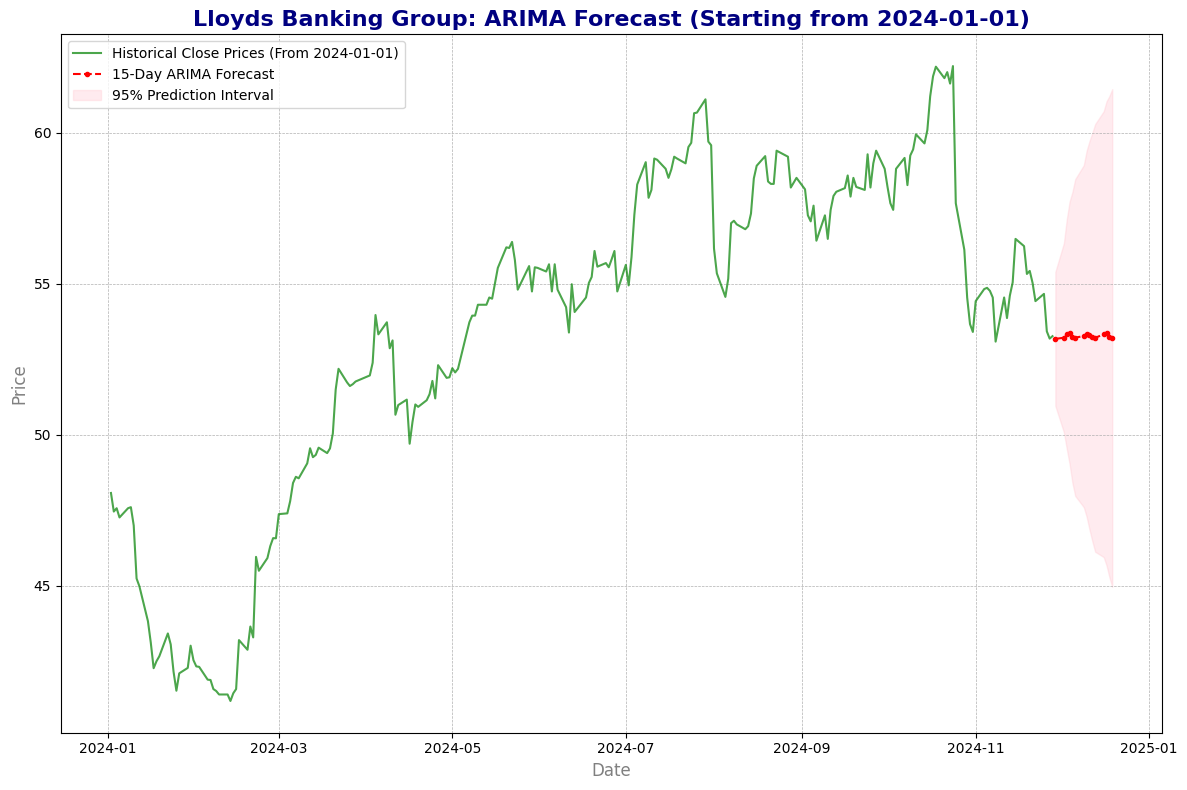

Forecasted Close Prices for the Next 15 Days of 2024:
           Date  Forecasted Close  Lower Bound  Upper Bound
3765 2024-11-29         53.170416    50.953394    55.387438
3766 2024-12-02         53.208337    50.079853    56.336822
3767 2024-12-03         53.326903    49.543581    57.110225
3768 2024-12-04         53.371991    49.035280    57.708702
3769 2024-12-05         53.218730    48.406902    58.030559
3770 2024-12-06         53.215175    47.971228    58.459122
3771 2024-12-09         53.259452    47.599888    58.919015
3772 2024-12-10         53.340332    47.285313    59.395350
3773 2024-12-11         53.288534    46.861212    59.715856
3774 2024-12-12         53.231233    46.476072    59.986393
3775 2024-12-13         53.202077    46.124969    60.279184
3776 2024-12-16         53.325476    45.946962    60.703990
3777 2024-12-17         53.352241    45.672109    61.032372
3778 2024-12-18         53.244067    45.283670    61.204465
3779 2024-12-19         53.199455    44.962317

In [19]:
# Filter historical data from 2024-01-01 onward
data.index = pd.to_datetime(data.index, format='%d-%m-%Y')  # Ensure the index is datetime
filtered_data = data[data.index >= '2024-01-01']

# Plot data from 2024-01-01 with forecast
plt.figure(figsize=(12, 8))
plt.plot(filtered_data.index, filtered_data['Close'], label='Historical Close Prices (From 2024-01-01)', color='green', alpha=0.7)
plt.plot(forecast_df['Date'], forecast_df['Forecasted Close'], label='15-Day ARIMA Forecast', color='red', linestyle='--', marker='.')
plt.fill_between(forecast_df['Date'], forecast_df['Lower Bound'], forecast_df['Upper Bound'], color='pink', alpha=0.3, label='95% Prediction Interval')
plt.title('Lloyds Banking Group: ARIMA Forecast (Starting from 2024-01-01)', fontsize=16, color='navy', weight='bold')
plt.xlabel('Date', fontsize=12, color='gray')
plt.ylabel('Price', fontsize=12, color='gray')
plt.legend()
plt.grid(visible=True, linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

# Display the forecasted values
print("Forecasted Close Prices for the Next 15 Days of 2024:")
print(forecast_df)


# Prophet

In [66]:
data.head(10)

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,LLOY.L,LLOY.L,LLOY.L,LLOY.L,LLOY.L,LLOY.L
Date,,,,,,
04-01-2010,36.779499,52.259998,52.259998,51.099998,51.400002,167623403
05-01-2010,38.025181,54.029999,54.759998,52.200001,52.500000,233026957
06-01-2010,38.419300,54.590000,55.230000,53.169998,55.000000,142079248
07-01-2010,40.066147,56.930000,57.070000,54.000000,54.860001,216171360
08-01-2010,40.045029,56.900002,57.520000,56.160000,56.990002,178033888
11-01-2010,39.503124,56.130001,57.950001,55.630001,57.799999,169834032
12-01-2010,39.390514,55.970001,56.290001,55.080002,55.590000,189050155
13-01-2010,39.411633,56.000000,56.200001,55.160000,55.639999,117598072


In [72]:
# If 'Date' is the index, reset it to make it a regular column
if 'Date' not in data.columns:
    data.reset_index(inplace=True)

# Select only 'Date' and 'Close' columns
data_for_prophet = data[['Date', 'Close']].copy()

# Rename the columns for Prophet
data_for_prophet.columns = ['ds', 'y']

# Drop rows with NaN values (if any)
data_for_prophet.dropna(subset=['ds', 'y'], inplace=True)

# Ensure 'y' is numeric
data_for_prophet['y'] = pd.to_numeric(data_for_prophet['y'], errors='coerce')
data_for_prophet.dropna(subset=['y'], inplace=True)  # Drop rows where 'y' is still NaN

# Convert 'ds' column to datetime with the correct format
data_for_prophet['ds'] = pd.to_datetime(data_for_prophet['ds'], format='%d-%m-%Y')

# Display the prepared data
print(data_for_prophet.head(10))

          ds          y
0 2010-01-04  52.259998
1 2010-01-05  54.029999
2 2010-01-06  54.590000
3 2010-01-07  56.930000
4 2010-01-08  56.900002
5 2010-01-11  56.130001
6 2010-01-12  55.970001
7 2010-01-13  56.000000
8 2010-01-14  57.500000
9 2010-01-15  56.779999


In [73]:
# Initialize and fit the Prophet model
prophet_model = Prophet()
prophet_model.fit(data_for_prophet)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmphznkt2q9/vf3wv8fd.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmphznkt2q9/dhlzti0y.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=55428', 'data', 'file=/tmp/tmphznkt2q9/vf3wv8fd.json', 'init=/tmp/tmphznkt2q9/dhlzti0y.json', 'output', 'file=/tmp/tmphznkt2q9/prophet_model5767trnl/prophet_model-20241129015110.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
01:51:10 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
01:51:14 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [74]:
# Forecast for the next 15 business days
future = prophet_model.make_future_dataframe(periods=15, freq='B')  # Business days
forecast = prophet_model.predict(future)

# Extract the forecasted values
forecasted_values = forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]

# Filter future predictions (next 15 days)
future_predictions = forecasted_values[forecasted_values['ds'] > data_for_prophet['ds'].max()]

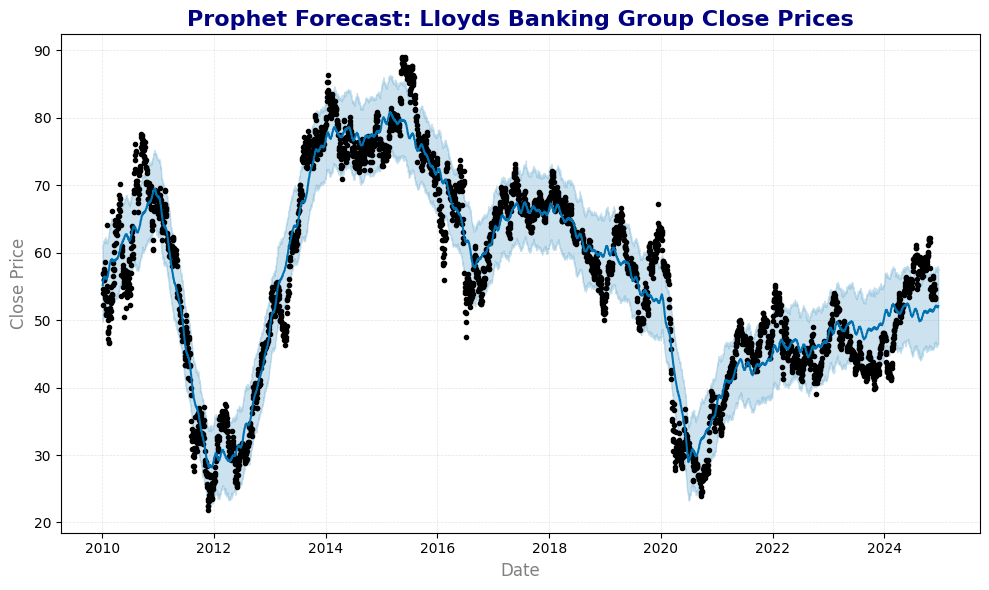

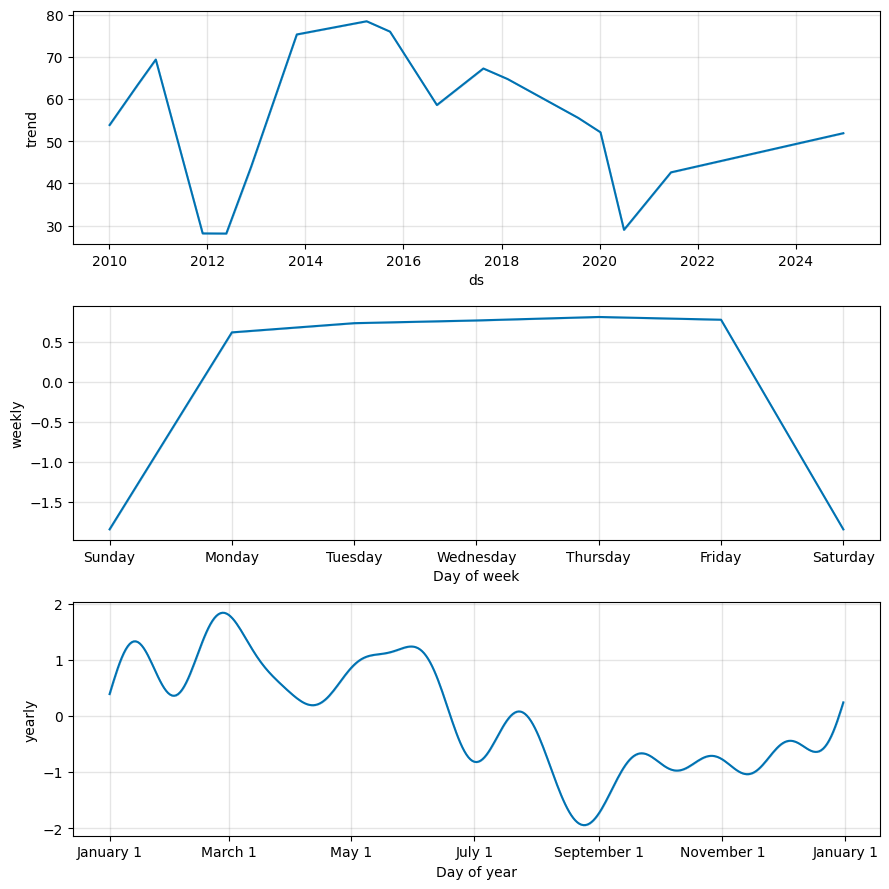

In [59]:
# Plot historical data and forecast
prophet_model.plot(forecast)
plt.title('Prophet Forecast: Lloyds Banking Group Close Prices', fontsize=16, color='navy', weight='bold')
plt.xlabel('Date', fontsize=12, color='gray')
plt.ylabel('Close Price', fontsize=12, color='gray')
plt.grid(visible=True, linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

# Component plots
prophet_model.plot_components(forecast)
plt.tight_layout()
plt.show()

RMSE: 4.3073
MSE: 18.5533
MAE: 3.3577


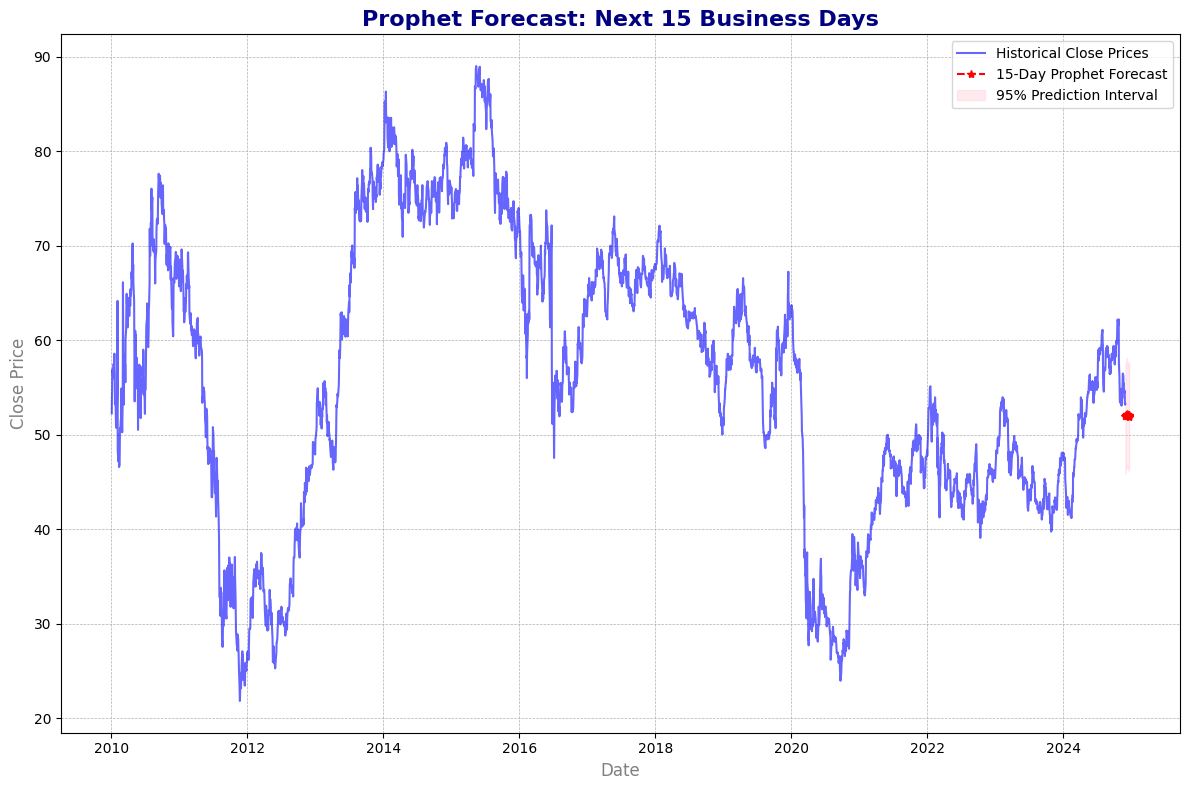

Forecasted Close Prices for the Next 15 Business Days:
             ds       yhat  yhat_lower  yhat_upper
3765 2024-11-29  51.998049   45.934526   57.423527
3766 2024-12-02  51.933424   46.510965   57.449835
3767 2024-12-03  52.067390   46.481368   57.723217
3768 2024-12-04  52.114300   46.545267   57.504976
3769 2024-12-05  52.164758   46.332612   57.765459
3770 2024-12-06  52.131756   46.845635   58.118061
3771 2024-12-09  51.949117   46.422708   57.082065
3772 2024-12-10  52.048862   46.633153   57.277559
3773 2024-12-11  52.066235   46.653592   57.145810
3774 2024-12-12  52.092999   46.610949   57.486082
3775 2024-12-13  52.043175   46.334920   57.695368
3776 2024-12-16  51.859042   46.211421   57.530046
3777 2024-12-17  51.976176   46.226370   57.341236
3778 2024-12-18  52.020092   46.690433   57.685819
3779 2024-12-19  52.082313   46.467523   57.373132


In [75]:
# Filter historical predictions for RMSE/MSE/MAE calculation
historical_forecast = forecast[forecast['ds'] <= data_for_prophet['ds'].max()]

# Calculate RMSE, MSE, and MAE
rmse = np.sqrt(mean_squared_error(data_for_prophet['y'], historical_forecast['yhat']))
mse = mean_squared_error(data_for_prophet['y'], historical_forecast['yhat'])
mae = mean_absolute_error(data_for_prophet['y'], historical_forecast['yhat'])

print(f"RMSE: {rmse:.4f}")
print(f"MSE: {mse:.4f}")
print(f"MAE: {mae:.4f}")

# Plot future predictions only
plt.figure(figsize=(12, 8))
plt.plot(data_for_prophet['ds'], data_for_prophet['y'], label='Historical Close Prices', color='blue', alpha=0.6)
plt.plot(future_predictions['ds'], future_predictions['yhat'], label='15-Day Prophet Forecast', color='red', linestyle='--', marker='*')
plt.fill_between(future_predictions['ds'],
                 future_predictions['yhat_lower'],
                 future_predictions['yhat_upper'],
                 color='pink', alpha=0.3, label='95% Prediction Interval')
plt.title('Prophet Forecast: Next 15 Business Days', fontsize=16, color='navy', weight='bold')
plt.xlabel('Date', fontsize=12, color='gray')
plt.ylabel('Close Price', fontsize=12, color='gray')
plt.legend()
plt.grid(visible=True, linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

# Display the forecasted values for the next 15 days
print("Forecasted Close Prices for the Next 15 Business Days:")
print(future_predictions)


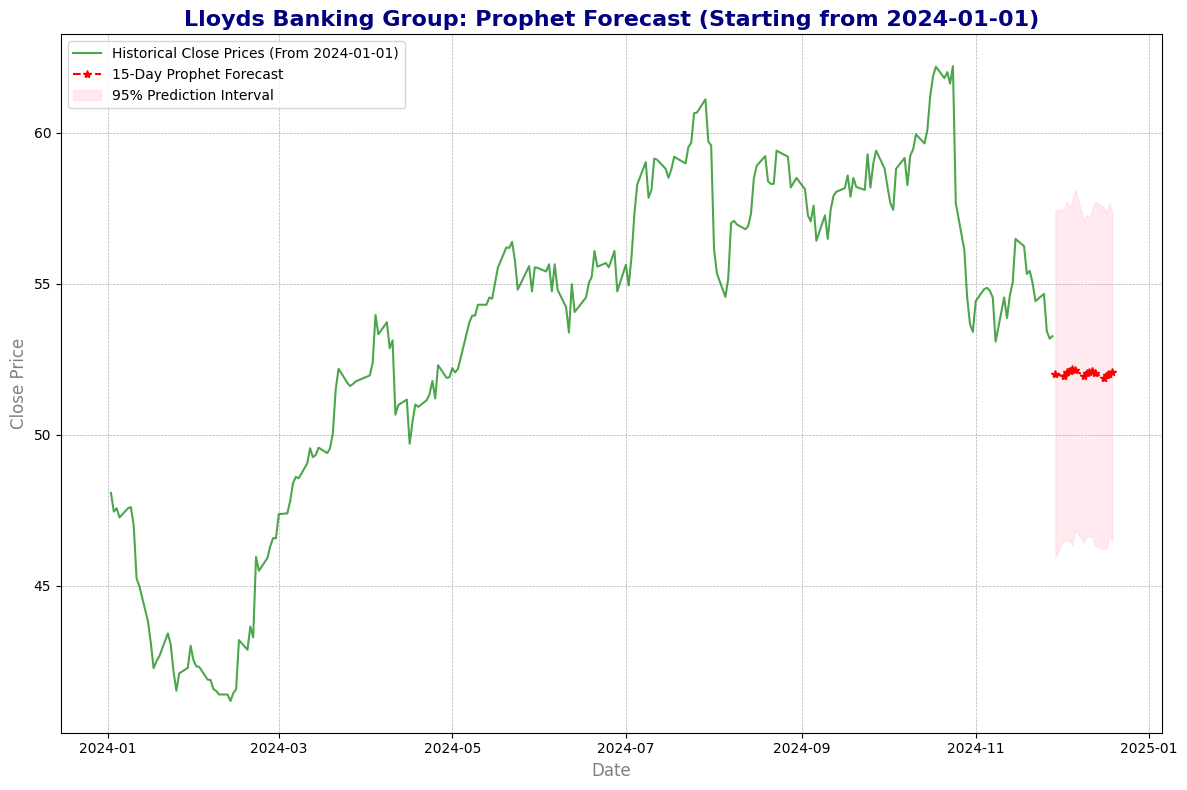

Forecasted Close Prices for the Next 15 Business Days:
             ds       yhat  yhat_lower  yhat_upper
3765 2024-11-29  51.998049   45.934526   57.423527
3766 2024-12-02  51.933424   46.510965   57.449835
3767 2024-12-03  52.067390   46.481368   57.723217
3768 2024-12-04  52.114300   46.545267   57.504976
3769 2024-12-05  52.164758   46.332612   57.765459
3770 2024-12-06  52.131756   46.845635   58.118061
3771 2024-12-09  51.949117   46.422708   57.082065
3772 2024-12-10  52.048862   46.633153   57.277559
3773 2024-12-11  52.066235   46.653592   57.145810
3774 2024-12-12  52.092999   46.610949   57.486082
3775 2024-12-13  52.043175   46.334920   57.695368
3776 2024-12-16  51.859042   46.211421   57.530046
3777 2024-12-17  51.976176   46.226370   57.341236
3778 2024-12-18  52.020092   46.690433   57.685819
3779 2024-12-19  52.082313   46.467523   57.373132


In [76]:
import matplotlib.pyplot as plt

# Ensure the 'ds' column is in datetime format
data_for_prophet['ds'] = pd.to_datetime(data_for_prophet['ds'])

# Filter the historical data from 2024-01-01 onward
filtered_data_prophet = data_for_prophet[data_for_prophet['ds'] >= '2024-01-01']

# Plot data from 2024-01-01 with forecast
plt.figure(figsize=(12, 8))
plt.plot(filtered_data_prophet['ds'], filtered_data_prophet['y'], label='Historical Close Prices (From 2024-01-01)', color='green', alpha=0.7)
plt.plot(future_predictions['ds'], future_predictions['yhat'], label='15-Day Prophet Forecast', color='red', linestyle='--', marker='*')
plt.fill_between(future_predictions['ds'],
                 future_predictions['yhat_lower'],
                 future_predictions['yhat_upper'],
                 color='pink', alpha=0.3, label='95% Prediction Interval')
plt.title('Lloyds Banking Group: Prophet Forecast (Starting from 2024-01-01)', fontsize=16, color='navy', weight='bold')
plt.xlabel('Date', fontsize=12, color='gray')
plt.ylabel('Close Price', fontsize=12, color='gray')
plt.legend()
plt.grid(visible=True, linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

# Display the forecasted values
print("Forecasted Close Prices for the Next 15 Business Days:")
print(future_predictions)


# HOLT - WINTERS Model

In [78]:
data.head(10)

Price,Date,Adj Close,Close,High,Low,Open,Volume
Ticker,,LLOY.L,LLOY.L,LLOY.L,LLOY.L,LLOY.L,LLOY.L
0,04-01-2010,36.779499,52.259998,52.259998,51.099998,51.400002,167623403
1,05-01-2010,38.025181,54.029999,54.759998,52.200001,52.500000,233026957
2,06-01-2010,38.419300,54.590000,55.230000,53.169998,55.000000,142079248
3,07-01-2010,40.066147,56.930000,57.070000,54.000000,54.860001,216171360
4,08-01-2010,40.045029,56.900002,57.520000,56.160000,56.990002,178033888
5,11-01-2010,39.503124,56.130001,57.950001,55.630001,57.799999,169834032
6,12-01-2010,39.390514,55.970001,56.290001,55.080002,55.590000,189050155
7,13-01-2010,39.411633,56.000000,56.200001,55.160000,55.639999,117598072
8,14-01-2010,40.467300,57.500000,58.000000,56.580002,57.000000,225878876


In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_squared_error, mean_absolute_error
from math import sqrt

# Assuming 'data' is your original dataset and has 'Date' and 'Close' columns
# Convert 'Date' to datetime if not already done
data['Date'] = pd.to_datetime(data['Date'], format='%d-%m-%Y')

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


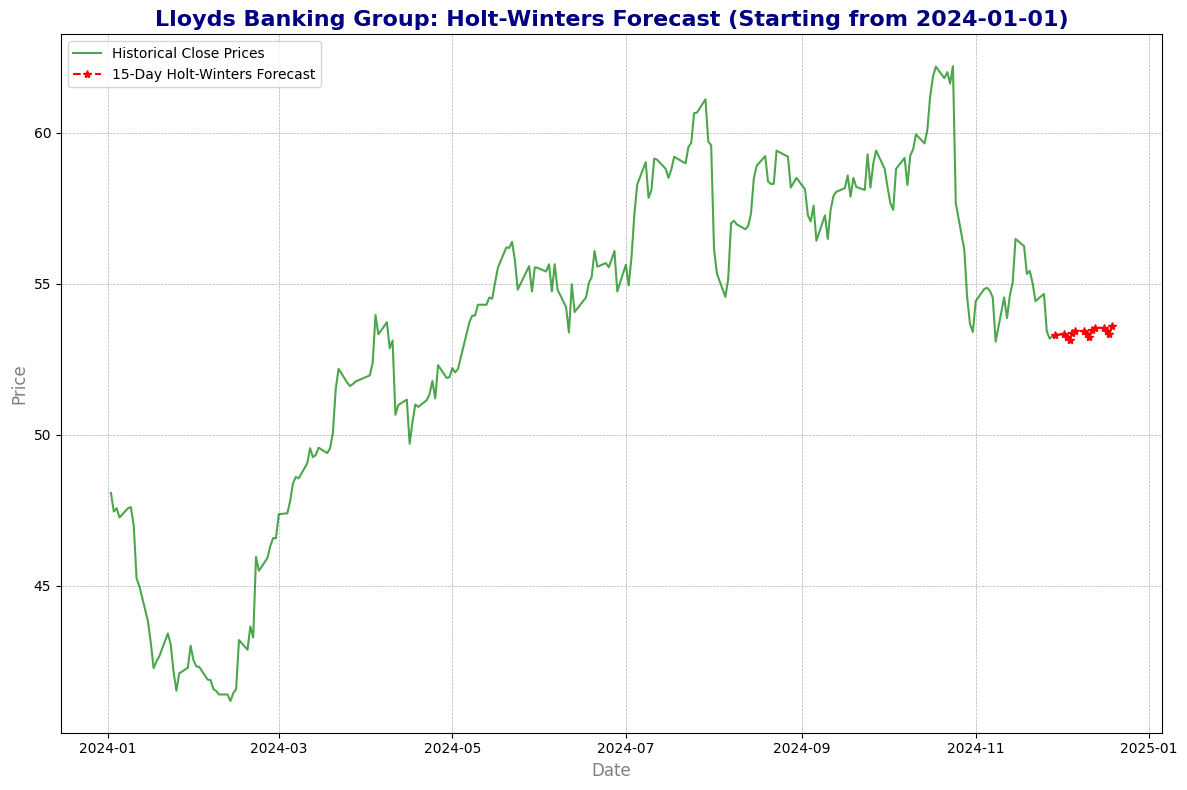

ValueError: Per-column arrays must each be 1-dimensional

In [84]:
# Filter data from 2024-01-01 onward for forecasting
data_filtered = data[data['Date'] >= '2024-01-01']

# Build the Holt-Winters Model
holt_winters_model = ExponentialSmoothing(data_filtered['Close'],
                                          trend='add',   # Additive trend
                                          seasonal='add', # Additive seasonality
                                          seasonal_periods=5)  # Adjust seasonal periods based on your data
holt_winters_model_fit = holt_winters_model.fit()

# Forecast the next 15 business days
forecast_holt_winters = holt_winters_model_fit.forecast(steps=15)

# Create a DataFrame to hold the forecasted values
forecast_dates = pd.date_range(start=data_filtered['Date'].max(), periods=16, freq='B')[1:]
forecast_df = pd.DataFrame({
    'Date': forecast_dates,
    'Forecasted Close': forecast_holt_winters
})

# Plot historical data and forecast
plt.figure(figsize=(12, 8))
plt.plot(data_filtered['Date'], data_filtered['Close'], label='Historical Close Prices', color='green', alpha=0.7)
plt.plot(forecast_df['Date'], forecast_df['Forecasted Close'], label='15-Day Holt-Winters Forecast', color='red', linestyle='--', marker='*')
plt.title('Lloyds Banking Group: Holt-Winters Forecast (Starting from 2024-01-01)', fontsize=16, color='navy', weight='bold')
plt.xlabel('Date', fontsize=12, color='gray')
plt.ylabel('Price', fontsize=12, color='gray')
plt.legend()
plt.grid(visible=True, linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

# Calculate RMSE, MSE, and MAE for the forecast
historical_forecast = pd.DataFrame({
    'ds': data_filtered['Date'].values,  # Convert to 1D array using .values
    'y_true': data_filtered['Close'].values,  # Convert to 1D array using .values
    'yhat': holt_winters_model_fit.fittedvalues.values  # Convert to 1D array using .values
})

# Calculate RMSE, MSE, MAE
rmse_hw = np.sqrt(mean_squared_error(historical_forecast['y_true'], historical_forecast['yhat']))
mse_hw = mean_squared_error(historical_forecast['y_true'], historical_forecast['yhat'])
mae_hw = mean_absolute_error(historical_forecast['y_true'], historical_forecast['yhat'])

# Print performance metrics
print(f"RMSE: {rmse_hw:.4f}")
print(f"MSE: {mse_hw:.4f}")
print(f"MAE: {mae_hw:.4f}")

# Display forecasted values for the next 15 business days
print("Forecasted Close Prices for the Next 15 Business Days:")
print(forecast_df)
